<a href="https://colab.research.google.com/github/KarthiK-ctrl-A/Exploratory_Analysis_on_geolocational_data/blob/main/dataanalysis_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('dataanalysis-internship')
jovian.set_colab_id('1EfRzY6RW_Q6_O9R0tO5XR1bbmPFc5KMi')

     |████████████████████████████████| 68 kB 2.8 MB/s 


# dataanalysis-internship
  1. Load the Dataset into colab
  2. Explore the codebook file and understand the columns and data types of each columns 3.Understand and perform data cleaning operations on the data set

In [6]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 4.1 MB/s 


In [7]:
import jovian

In [8]:
# Execute this to save new versions of the notebook
jovian.commit(project="dataanalysis-internship")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


## Exploratory Data Analysis

# Task - 1
 1. Load the Dataset into colab
 2. Explore the codebook file and understand the columns and data types of each columns
 3.Understand and perform data cleaning operations on the data set
 



In [9]:
pip install opendatasets --upgrade --quiet

In [12]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/borapajo/food-choices?select=food_coded.csv'
od.download(dataset_url)

Skipping, found downloaded files in "./food-choices" (use force=True to force download)


In [13]:
data_file = './food-choices/food_coded.csv'

- Data Cleaning and Preprocessing

In [16]:
import numpy as np 
from tabulate import tabulate
import pandas as pd 
from sklearn.cluster import KMeans
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 

In [17]:
df1 = pd.read_csv(data_file)

In [18]:
df1 = pd.read_csv(data_file)
df=df1[["cook","diet_current_coded","eating_out","sports","exercise","fav_cuisine_coded","on_off_campus","pay_meal_out","fav_food","fruit_day","income"]]
df.dropna(axis=0,inplace=True)
df.to_csv('./food-choices/food_choices.csv')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [19]:
print(tabulate(df,headers = 'keys', tablefmt = 'psql'))

+-----+--------+----------------------+--------------+----------+------------+---------------------+-----------------+----------------+------------+-------------+----------+
|     |   cook |   diet_current_coded |   eating_out |   sports |   exercise |   fav_cuisine_coded |   on_off_campus |   pay_meal_out |   fav_food |   fruit_day |   income |
|-----+--------+----------------------+--------------+----------+------------+---------------------+-----------------+----------------+------------+-------------+----------|
|   0 |      2 |                    1 |            3 |        1 |          1 |                   3 |               1 |              2 |          1 |           5 |        5 |
|   1 |      3 |                    2 |            2 |        1 |          1 |                   1 |               1 |              4 |          1 |           4 |        4 |
|   2 |      1 |                    3 |            2 |        2 |          2 |                   1 |               2 |            

In [21]:
df.describe()

,cook,diet_current_coded,eating_out,sports,exercise,fav_cuisine_coded,on_off_campus,pay_meal_out,fav_food,fruit_day,income
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,2.733333,1.733333,2.533333,1.352381,1.590476,2.485714,1.323810,3.438095,1.704762,4.247619,4.619048
std,1.030932,0.737285,1.109978,0.480003,0.675039,2.029183,0.657724,1.064495,0.897902,0.938298,1.423572
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000,4.000000
50%,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,5.000000
75%,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,1.000000,4.000000,3.000000,5.000000,6.000000
max,5.000000,4.000000,5.000000,2.000000,3.000000,8.000000,4.000000,6.000000,3.000000,5.000000,6.000000


income
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
4.0    AxesSubplot(0.125,0.125;0.775x0.755)
5.0    AxesSubplot(0.125,0.125;0.775x0.755)
6.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cook, dtype: object

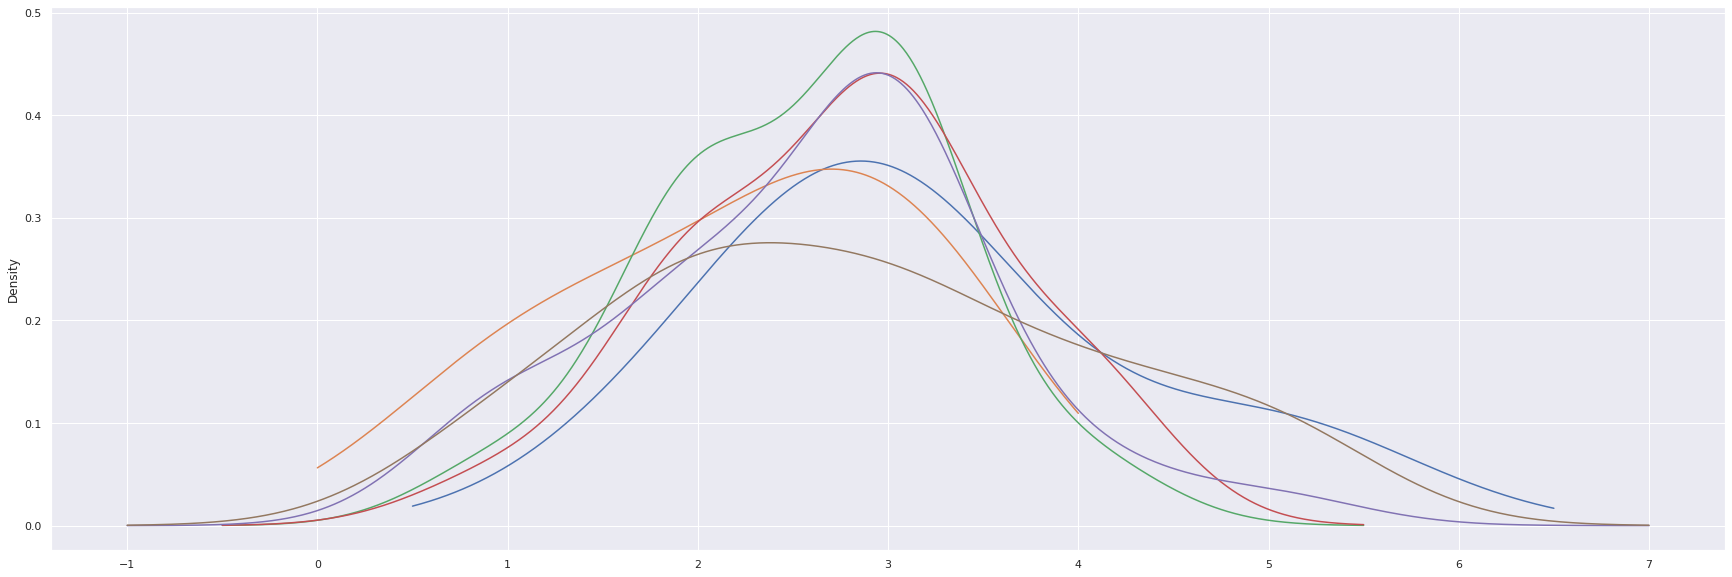

In [49]:
df.groupby('income').cook.plot(kind='kde')

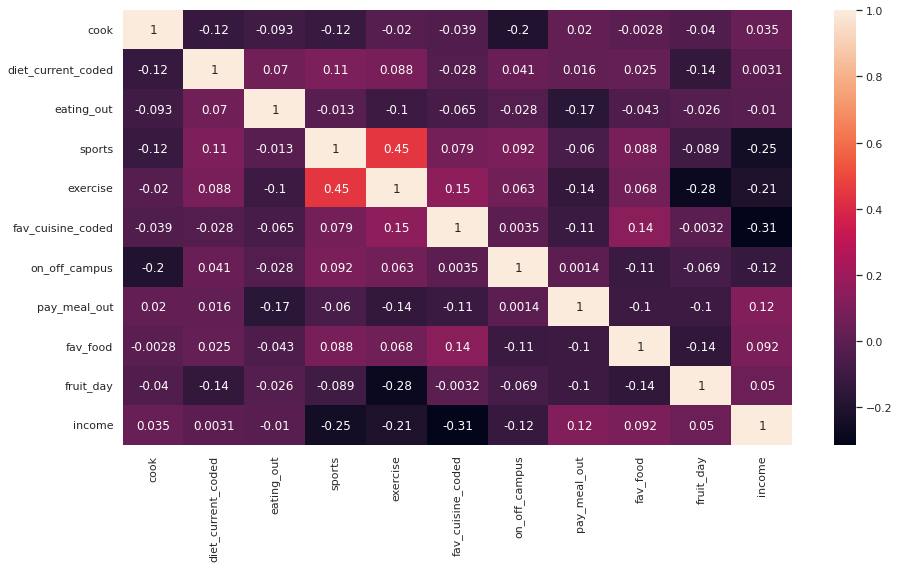

In [25]:
corelation = df.corr()

sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels = corelation.columns, annot= True)
sns.set(rc = {'figure.figsize':(30,15)})

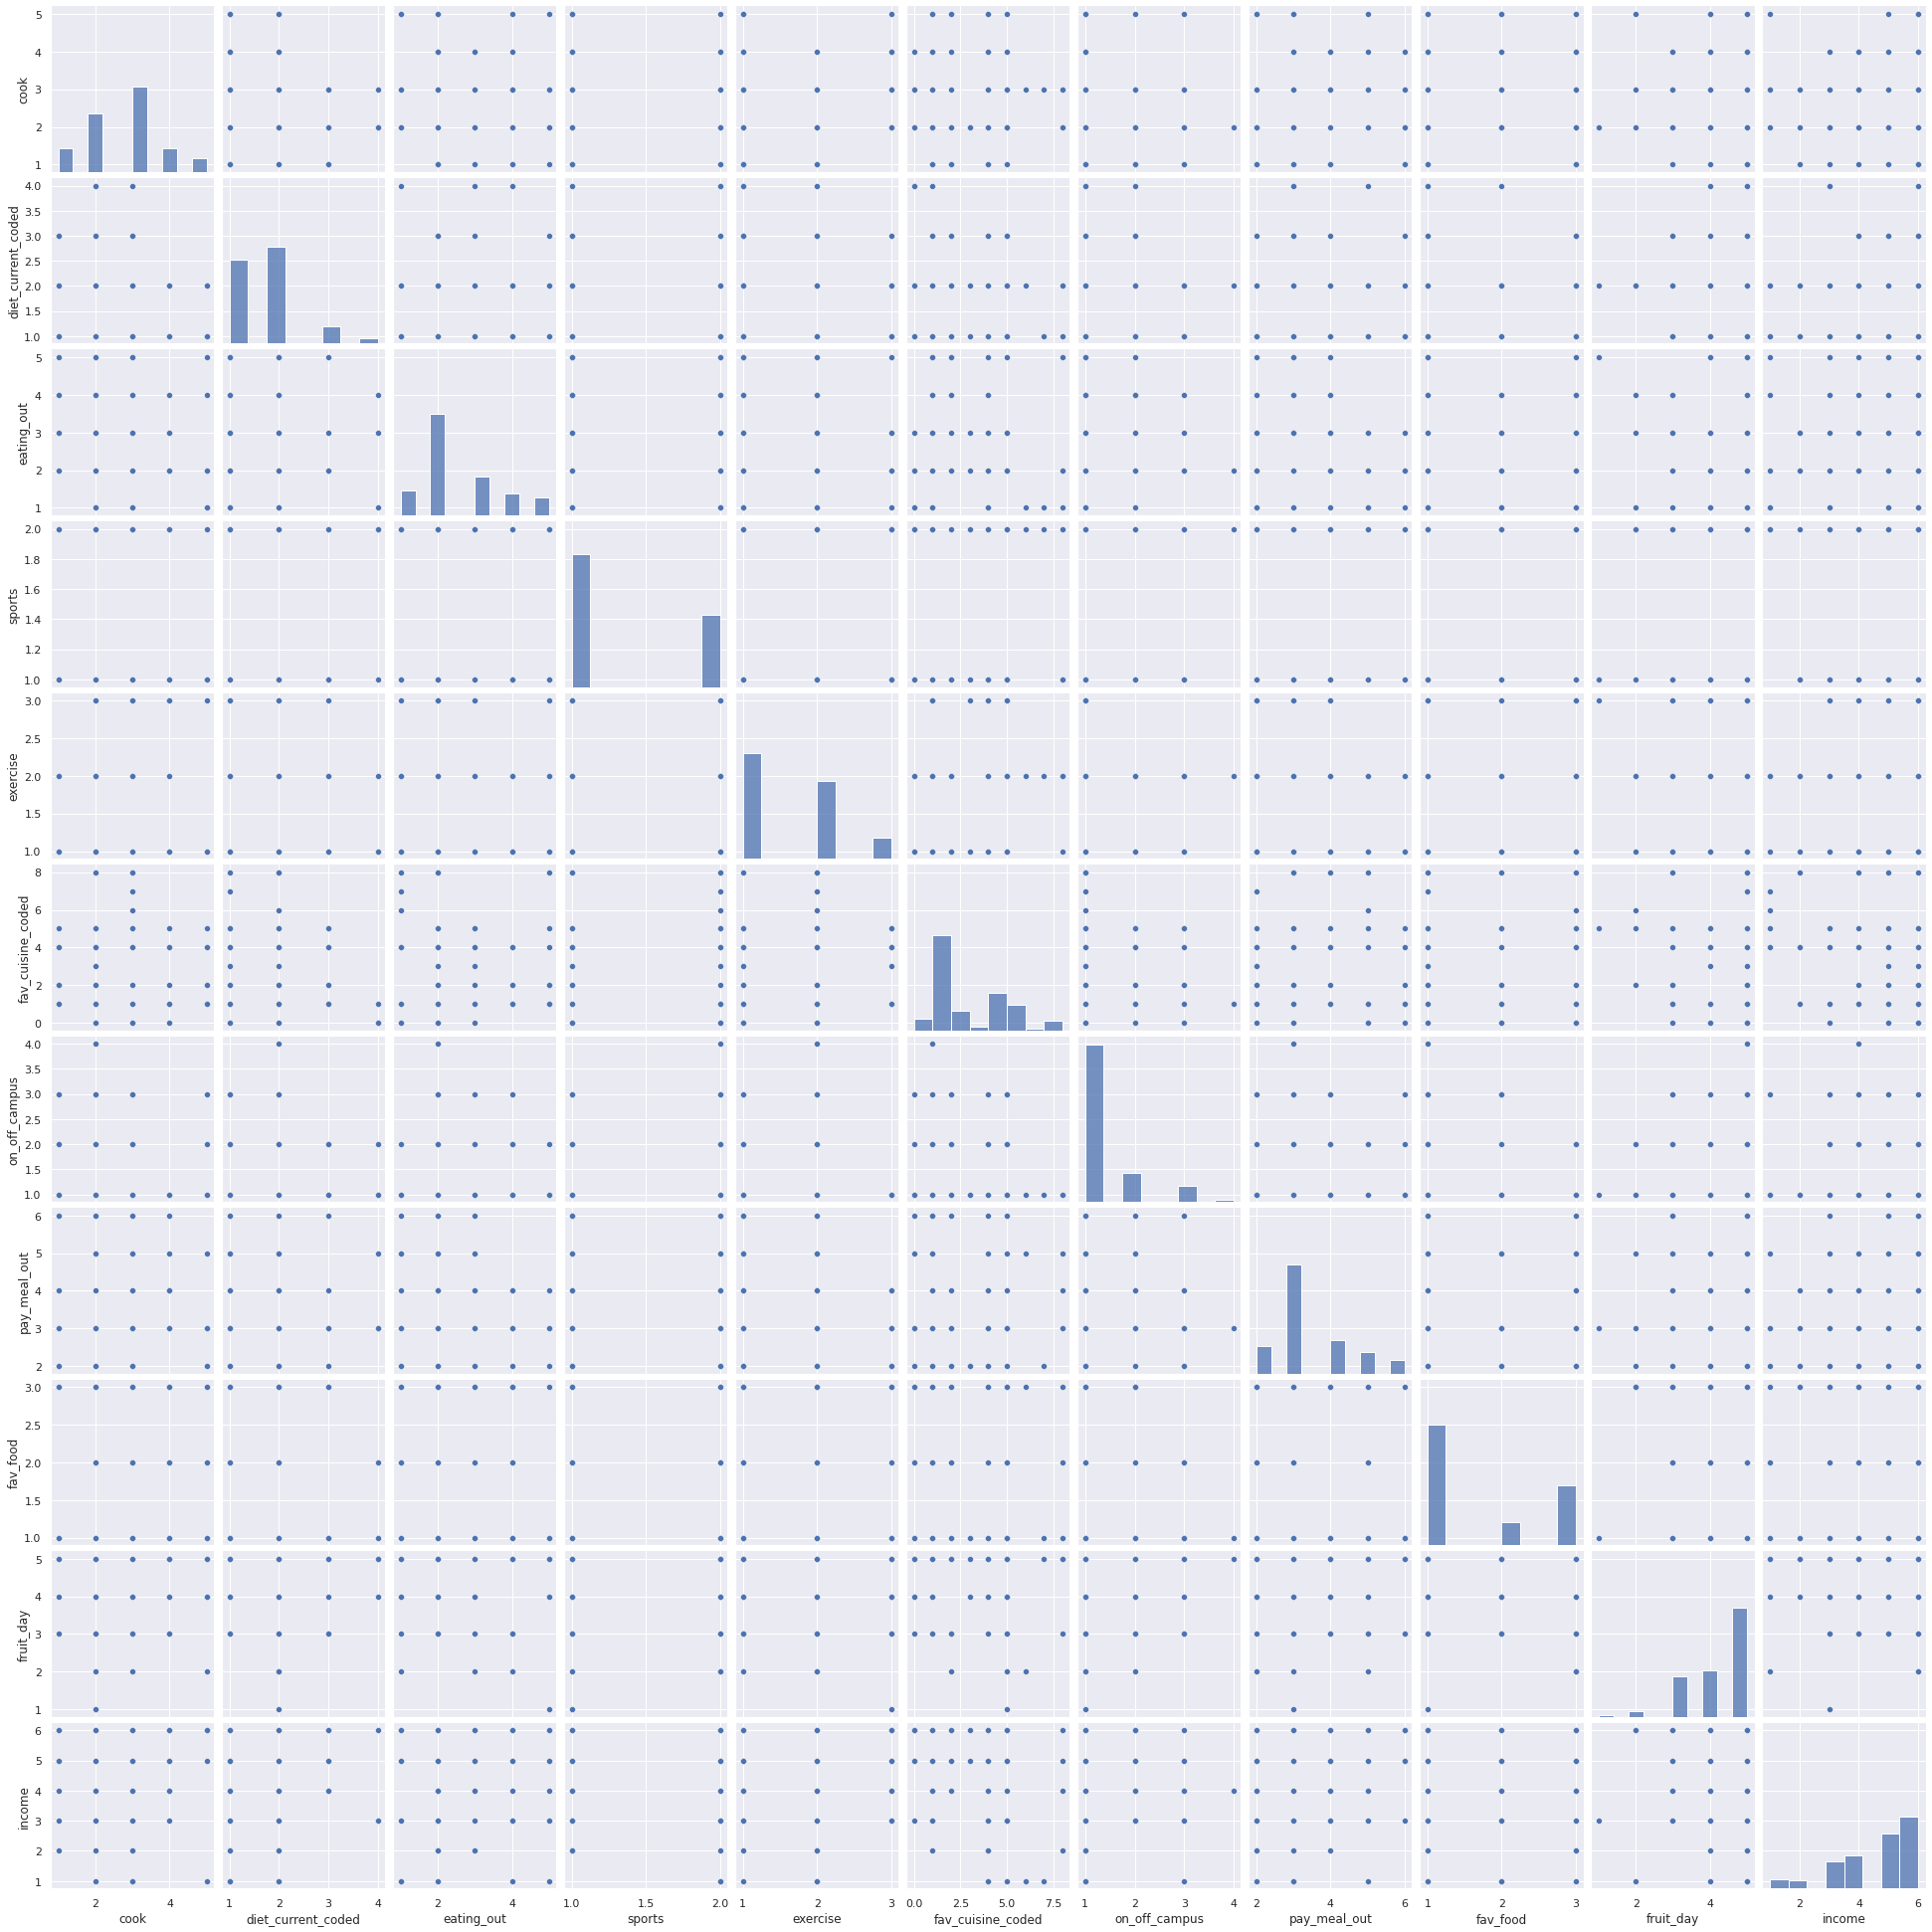

In [26]:
sns.pairplot(df)

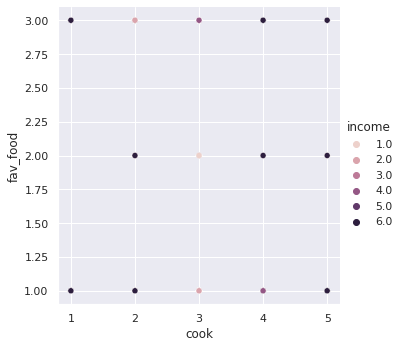

In [27]:
sns.relplot(x = 'cook',y = 'fav_food', hue='income',data = df)

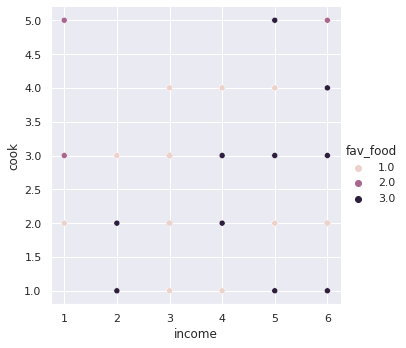

In [29]:
sns.relplot(x = 'income',y = 'cook', hue='fav_food',data = df)

# Task - 2

- Data visualization and exploration

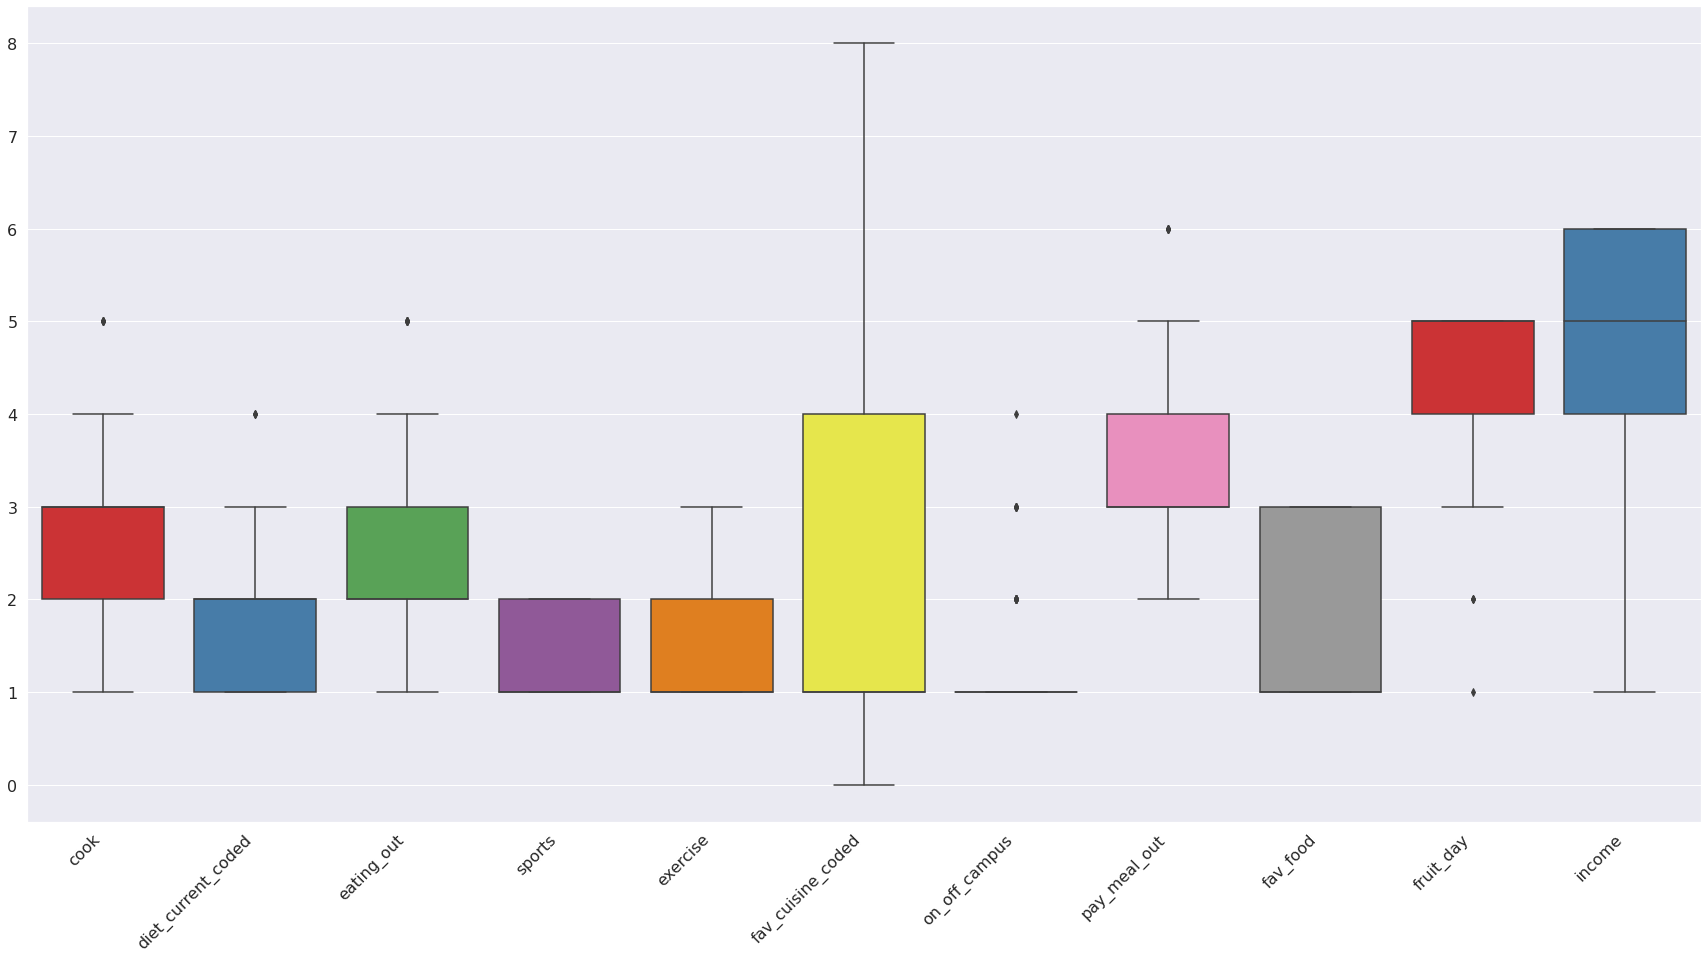

<Figure size 2160x1080 with 0 Axes>

In [32]:
sns.boxplot(data=df, palette="Set1").tick_params(labelsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.gcf().set_size_inches(30, 15)

# Task - 3

- Run Kmeans clustering on the cleaned dataset and obtain the optimal number of clusters

In [34]:
k = 3
kmeans = KMeans(n_clusters = k, random_state=0).fit(df)
df['Cluster']=kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.

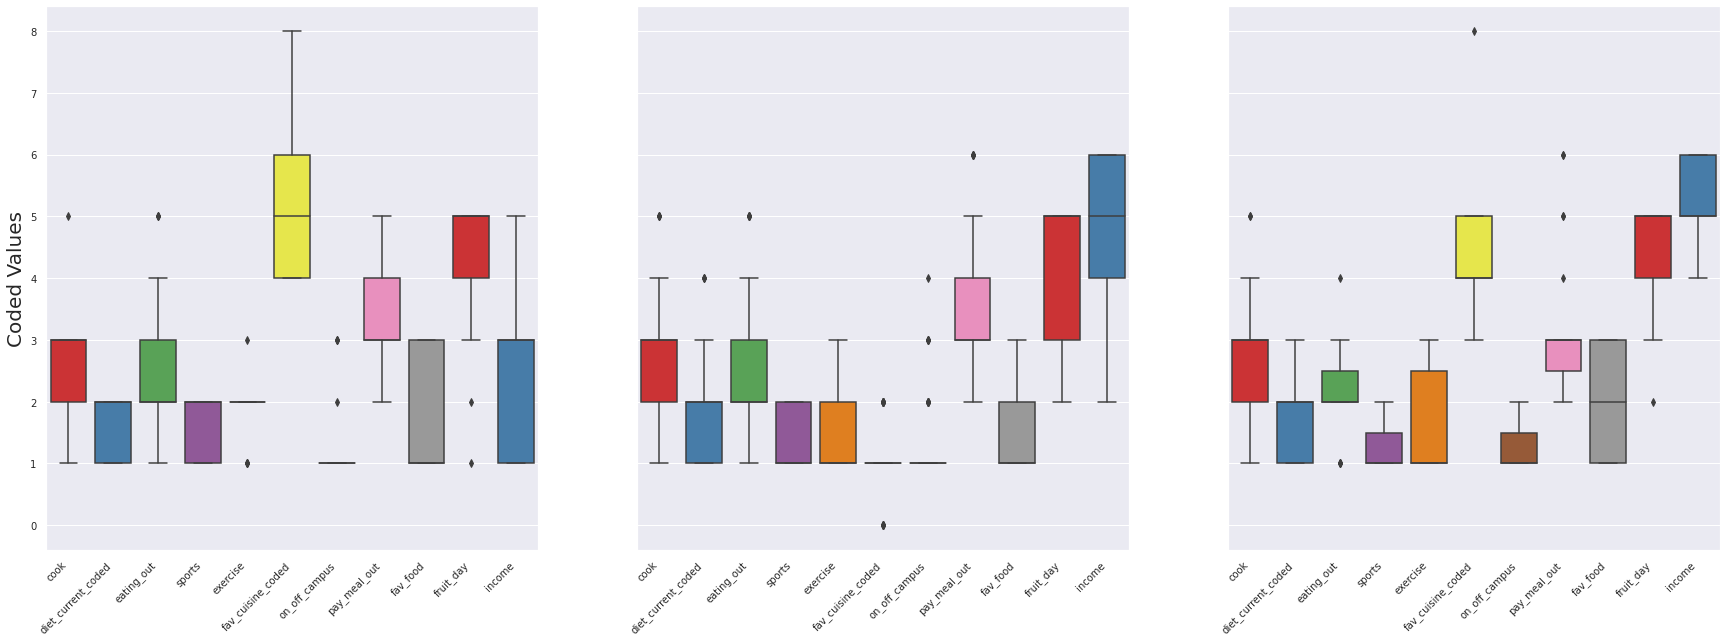

<Figure size 2160x1080 with 0 Axes>

In [51]:
k = 3
kmeans = KMeans(n_clusters = k, random_state=0).fit(df)
df['Cluster']=kmeans.labels_

fig, axes = plt.subplots(1, k, sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=20)

for i in range(k):
     plt.sca(axes[i])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(palette="Set1",data = df[df['Cluster'] == i].drop('Cluster',1),
                 ax=axes[i]).tick_params(labelsize=10)
     sns.set(rc = {'figure.figsize':(30,10)})
        
plt.show()
plt.gcf().set_size_inches(30, 15)

# Task - 4&5

- Get geolocational data using Foursquare or HERE GEO API
- Clean the data set obtained from the API
- perform Data cleaning operation
- using folium plot on the graph

In [ ]:
import json  
import pandas as pd  
from pandas.io.json import json_normalize  
import requests
from tabulate import tabulate
from sklearn.cluster import KMeans
import random
import numpy as np
import pandas as pd
import folium



In [ ]:
url = 'https://discover.search.hereapi.com/v1/discover?in=circle:19.1334,72.9133;r=10000&q=apartment&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'
data = requests.get(url).json()
d=json_normalize(data['items'])
d.to_csv('food-choices/apartment.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
d2=d[['title','address.label','distance','access','position.lat','position.lng','address.postalCode','contacts','id']]
d2.to_csv('food-choices/cleaned_apartment.csv')

In [ ]:
df_final=d2[['position.lat','position.lng']]

In [ ]:
CafeList=[]
DepList=[]
GymList=[]
latitudes = list(d2['position.lat'])
longitudes = list( d2['position.lng'])
for lat, lng in zip(latitudes, longitudes):    
    radius = '1000' #Set the radius to 1000 metres
    latitude=lat
    longitude=lng
    
    search_query = 'cafe' #Search for any cafes
    url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&q={}&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'.format(latitude, longitude, radius, search_query)
    results = requests.get(url).json()
    venues=json_normalize(results['items'])
    CafeList.append(venues['title'].count())
	
    search_query = 'gym' #Search for any gyms
    url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&q={}&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'.format(latitude, longitude, radius, search_query)
    results = requests.get(url).json()
    venues=json_normalize(results['items'])
    GymList.append(venues['title'].count())

    

df_final['Cafes'] = CafeList

df_final['Gyms'] = GymList

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [ ]:
print(tabulate(df_final,headers='keys',tablefmt='github'))

|    |   position.lat |   position.lng |   Cafes |   Gyms |
|----|----------------|----------------|---------|--------|
|  0 |        19.1255 |        72.9193 |       8 |     20 |
|  1 |        19.1234 |        72.9127 |      20 |     20 |
|  2 |        19.1193 |        72.9123 |      19 |     20 |
|  3 |        19.1175 |        72.8837 |       9 |     20 |
|  4 |        19.1627 |        72.9329 |       3 |      7 |
|  5 |        19.096  |        72.9136 |      13 |     16 |
|  6 |        19.1117 |        72.8751 |      17 |     20 |
|  7 |        19.1665 |        72.9558 |       5 |     20 |
|  8 |        19.0781 |        72.9117 |      15 |     20 |
|  9 |        19.1718 |        72.9557 |       6 |     20 |
| 10 |        19.1628 |        72.8579 |       5 |     16 |
| 11 |        19.124  |        72.8468 |      11 |     20 |
| 12 |        19.1462 |        72.8459 |       3 |      9 |
| 13 |        19.1078 |        72.8491 |      15 |     20 |
| 14 |        19.0962 |        72.8542 |

In [ ]:
kclusters = 3

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_final)
df_final['Cluster']=kmeans.labels_
df_final['Cluster']=df_final['Cluster'].apply(str)

print(tabulate(df_final,headers='keys',tablefmt='github'))

|    |   position.lat |   position.lng |   Cafes |   Gyms |   Cluster |
|----|----------------|----------------|---------|--------|-----------|
|  0 |        19.1255 |        72.9193 |       8 |     20 |         1 |
|  1 |        19.1234 |        72.9127 |      20 |     20 |         2 |
|  2 |        19.1193 |        72.9123 |      19 |     20 |         2 |
|  3 |        19.1175 |        72.8837 |       9 |     20 |         1 |
|  4 |        19.1627 |        72.9329 |       3 |      7 |         0 |
|  5 |        19.096  |        72.9136 |      13 |     16 |         2 |
|  6 |        19.1117 |        72.8751 |      17 |     20 |         2 |
|  7 |        19.1665 |        72.9558 |       5 |     20 |         1 |
|  8 |        19.0781 |        72.9117 |      15 |     20 |         2 |
|  9 |        19.1718 |        72.9557 |       6 |     20 |         1 |
| 10 |        19.1628 |        72.8579 |       5 |     16 |         1 |
| 11 |        19.124  |        72.8468 |      11 |     20 |     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#Plotting clustered locations on map using Folium

#define coordinates of the college
map_bom=folium.Map(location=[19.1334,72.9133],zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'

latitudes = list(df_final['position.lat'])
longitudes = list(df_final['position.lng'])
labels = list(df_final['Cluster'])
names=list(d2['title'])
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_bom)


In [ ]:
map_bom.add_child(locations)
folium.Marker([19.1334,72.9133],popup='IIT Bombay').add_to(map_bom)

#saving the map 
map_bom.save("map-IITBombay.html")